In [1]:
%matplotlib inline
# from preamble import *

## Supervised Learning
### Classification and Regression

### Supervised Machine Learning Algorithms
#### Some Sample Datasets

X.shape: (26, 2)


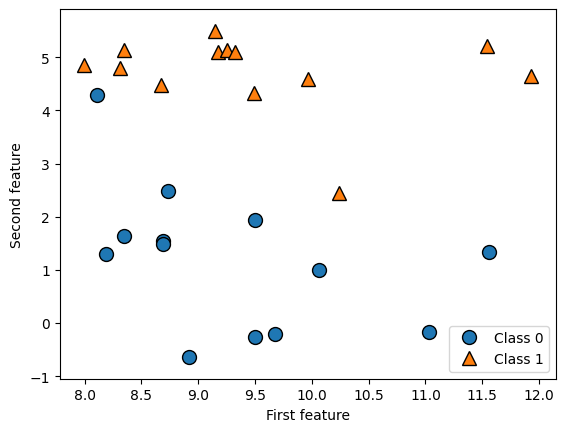

In [2]:
# generate dataset
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

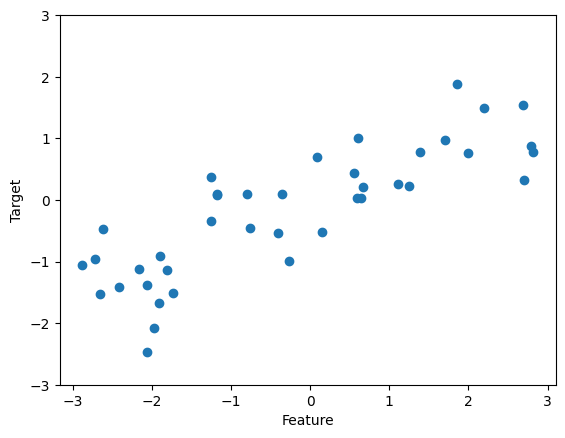

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [6]:
import numpy as np
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [7]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print("Data shape:", housing.data.shape)

Data shape: (20640, 8)


#### k-Nearest Neighbors
##### k-Neighbors classification

Predictions made by the one-nearest-neighbor model on the forge dataset:

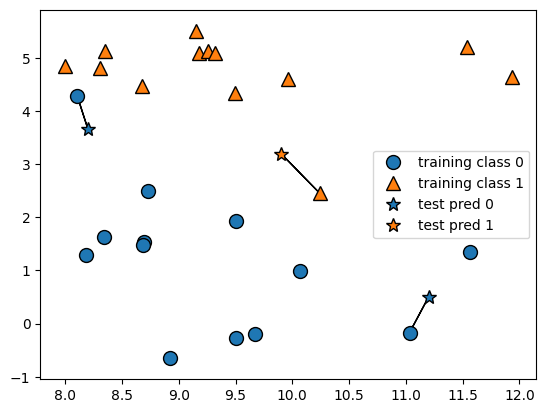

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

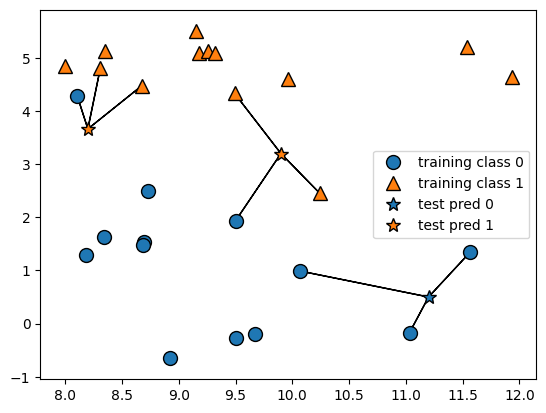

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [15]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


##### Analyzing KNeighborsClassifier

The following code produces the visualizations of the decision boundaries for one,
 three, and nine neighbors 

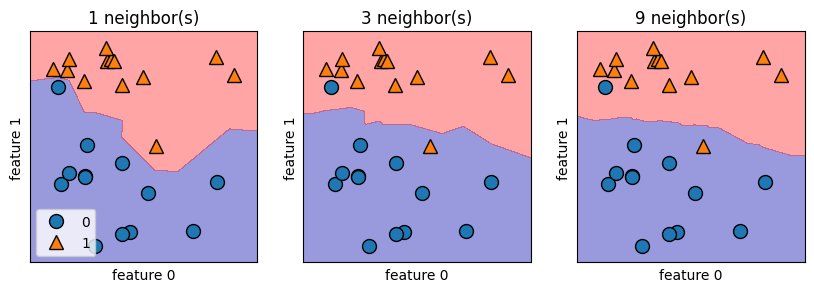

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

connection between model complexity
 and generalization 

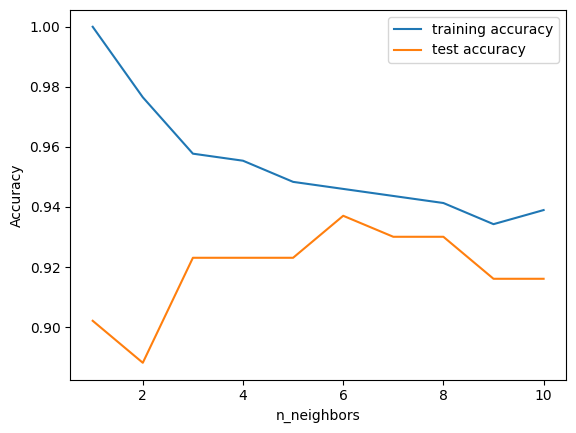

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

##### k-neighbors regression

let’s
 start by using the single nearest neighbor, this time using the wave dataset. We’ve
 added three test data points as green stars on the x-axis. The prediction using a single
 neighbor is just the target value of the nearest neighbor. These are shown as blue stars
 in Figure

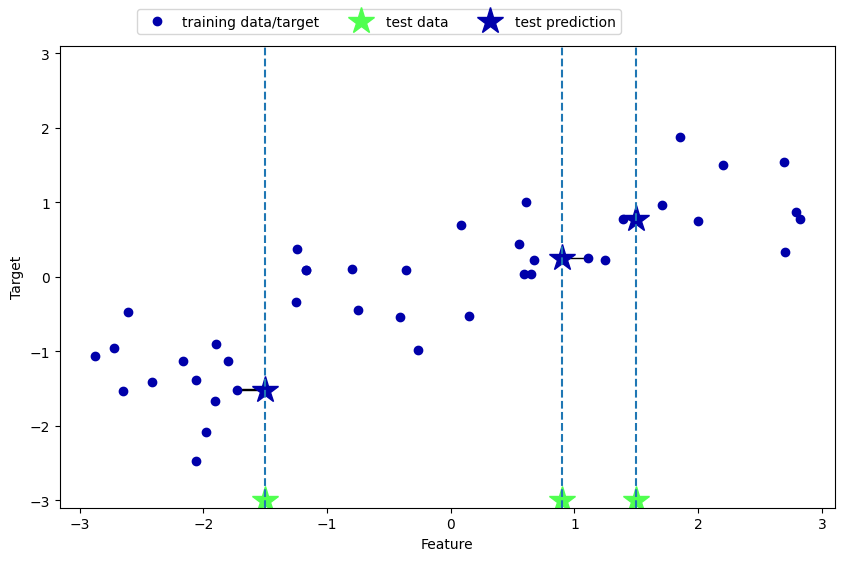

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

n > 1, so the prediction is the average, or mean, of the relevant
 neighbors

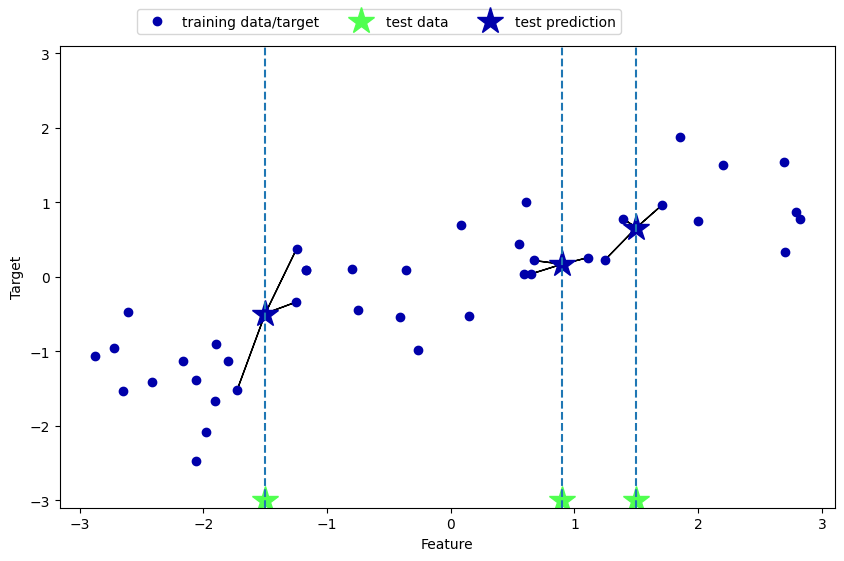

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


The R2 score, also known as the coefficient of determination, is a meas
ure of goodness of a prediction for a regression model, and yields a score between 0
 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
 to a constant model that just predicts the mean of the training set responses

It is calculated using the formula: R2 = 1 – (SSR / SST), where SSR represents the sum of squared residuals and SST represents the total sum of squares. R2 =  [ (nΣxy – (Σx)(Σy)) / (√nΣx2-(Σx)2 * √nΣy2-(Σy)2) ]2

In [22]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analyzing KNeighborsRegressor

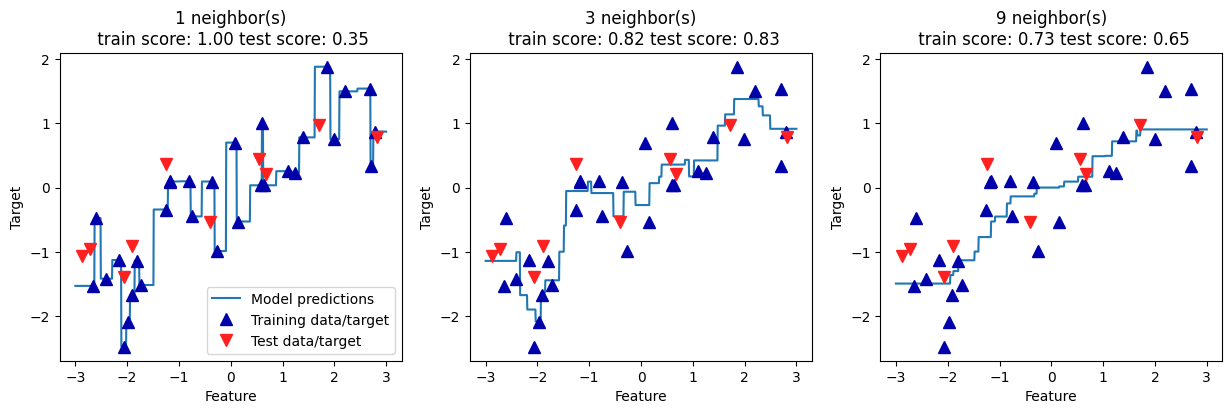

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training
 set has an obvious influence on the predictions, and the predicted values go through
 all of the data points. This leads to a very unsteady prediction. Considering more
 neighbors leads to smoother predictions, but these do not fit the training data as well.

Euclidean distance is used by default: d = √[ (x
2
 – x
1
)2 + (y
2
 – y
1
)2]

##### Strengths, weaknesses, and parameters

#### Linear Models
##### Linear models for regression
\begin{align*}
\end{align*}

Trying to learn the parameters w[0] and b on our one-dimensional wave dataset
 might lead to the following line

w[0]: 0.393906  b: -0.031804


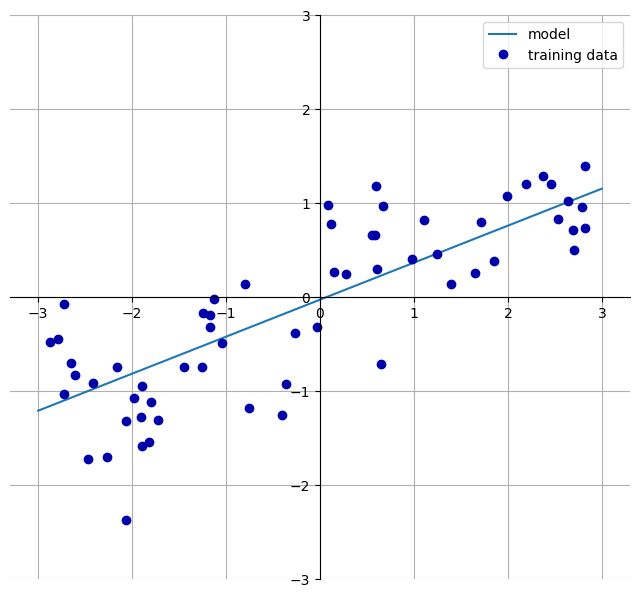

In [24]:
mglearn.plots.plot_linear_regression_wave()

For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y
 can be perfectly modeled (on the training set) as a linear function.

There are many different linear models for regression. The difference between these
 models lies in how the model parameters w and b are learned from the training data,
 and how model complexity can be controlled.

#### Linear regression aka ordinary least squares (OLS)

Linear regression finds the parameters w and b that mini
mize the mean squared error between predictions and the true regression targets, y,
 on the training set. MSE = Σ (yi − pi)2/ n

In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
 attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

In [26]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [27]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An R2 of around 0.66 is not very good, but we can see that the scores on the training
 and test sets are very close together. This means we are likely underfitting, not over
fitting. For this one-dimensional dataset, there is little danger of overfitting, as the
 model is very simple (or restricted).

In [63]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


With higher-dimensional datasets near models become more powerful, and there is a higher chance of overfitting. Boston Housing dataset has 506 samples and 105 derived features. When comparing training set and test set scores, we find that we predict very accurately on the training set, but the R2 on the test set is much worse. This discrepancy between performance on the training set and the test set is a clear sign of overfitting.

##### Ridge regression

Similar to OLS, but the magnitude of coefficients must be as small as possible. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting.

In [64]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0.  Increasing alpha forces coefficients to move more toward zero, which decreases
 training set performance but might help generalization.

In [65]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression

In [66]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Comparing coefficient magnitudes for ridge regression with different values
 of alpha and linear regression

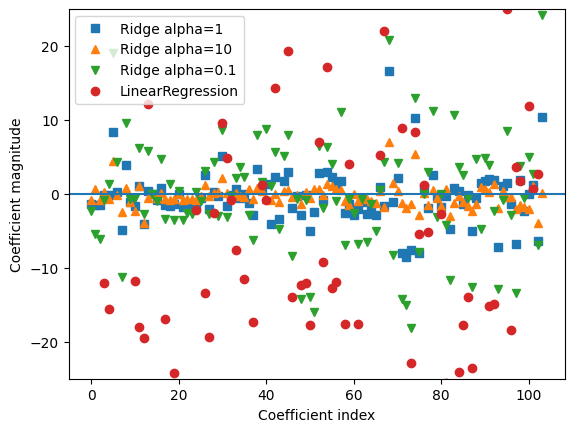

In [67]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

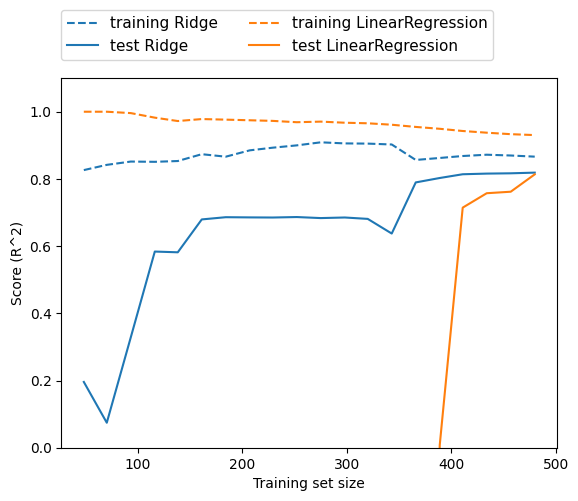

In [68]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. The lesson here is that with enough training data, regularization becomes less important since  If more data is added, it becomes harder for a model to overfit.

##### Lasso

 An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
 regression, using the lasso also restricts coefficients to be close to zero, but in a
 slightly different way, called L1 regularization. The consequence of L1 regularization
 is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to
 interpret, and can reveal the most important features of your model.

In [69]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


 As you can see, Lasso does quite badly, both on the training and the test set. This
 indicates that we are underfitting, and we find that it used only 4 of the 105 features.
 Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
 how strongly coefficients are pushed toward zero. In the previous example, we used
 the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we
 do this, we also need to increase the default setting of max_iter (the maximum num
ber of iterations to run)

In [70]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


 A lower alpha allowed us to fit a more complex model, which worked better on the
 training and test data. The performance is slightly better than using Ridge, and we are
 using only 33 of the 105 features. This makes this model potentially easier to understand.
 If we set alpha too low, however, we again remove the effect of regularization and end
 up overfitting, with a result similar to LinearRegression

In [71]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Again, we can plot the coefficients of the different models

Text(0, 0.5, 'Coefficient magnitude')

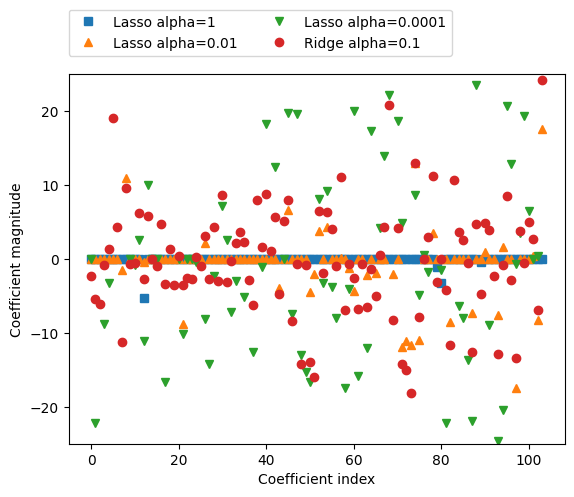

In [72]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##### Linear models for classification

Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:
 ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

 The formula looks very similar to the one for linear regression, but instead of just
 returning the weighted sum of the features, we threshold the predicted value at zero.
 If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
 predict the class +1. 

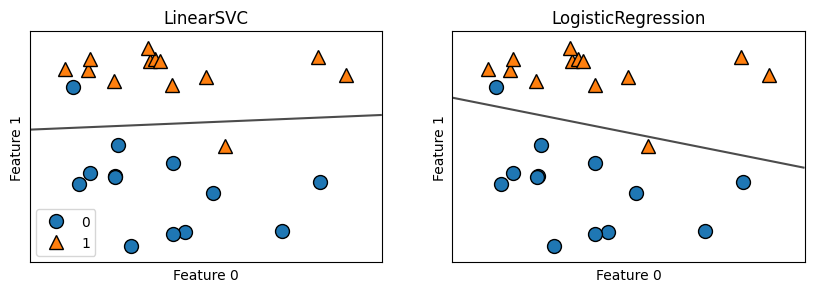

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

For LogisticRegression and LinearSVC the trade-off parameter that determines the
 strength of the regularization is called C.  Using low values of C
 will cause the algorithms to try to adjust to the “majority” of data points, while using
 a higher value of C stresses the importance that each individual data point be classified correctly. 

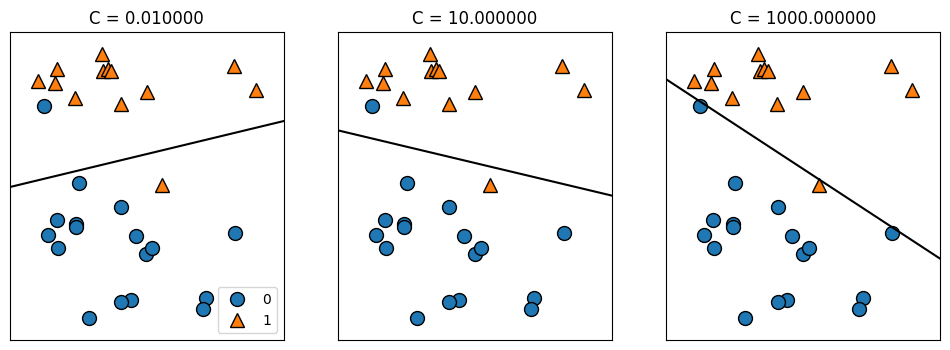

In [75]:
mglearn.plots.plot_linear_svc_regularization()

In [81]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train) # C=1 by default
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


as training and test set performance are very
 close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible

In [83]:
logreg100 = LogisticRegression(max_iter=100000, C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


In [84]:
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


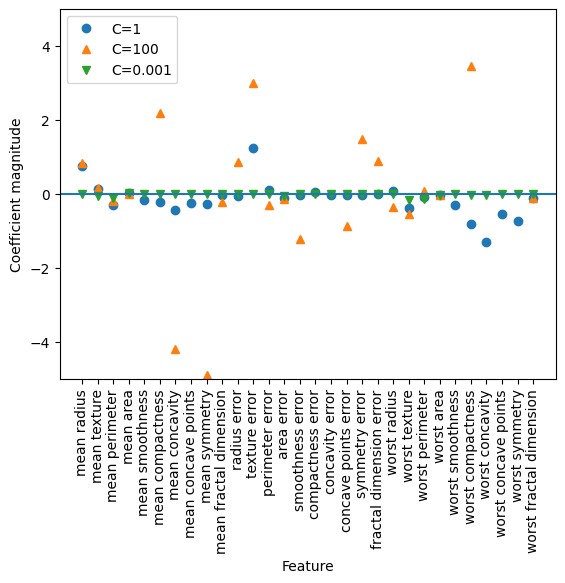

In [85]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


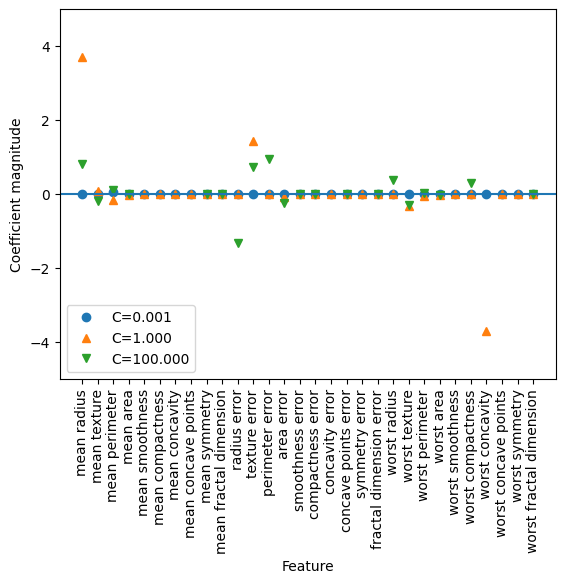

In [87]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(max_iter=1000, C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification
\begin{align*}
\end{align*}

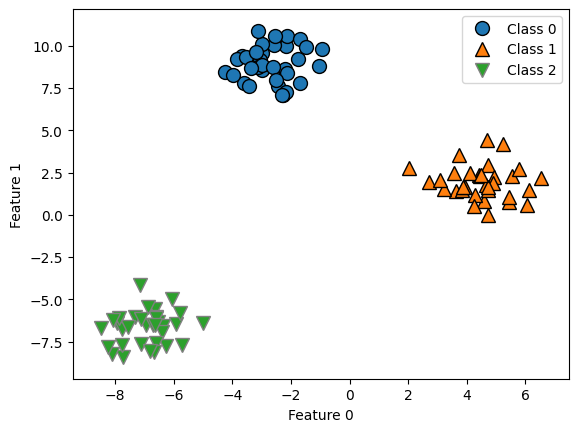

In [88]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [89]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


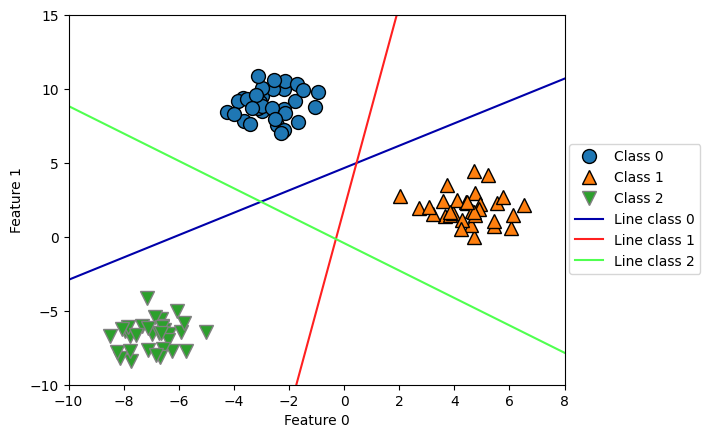

In [90]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

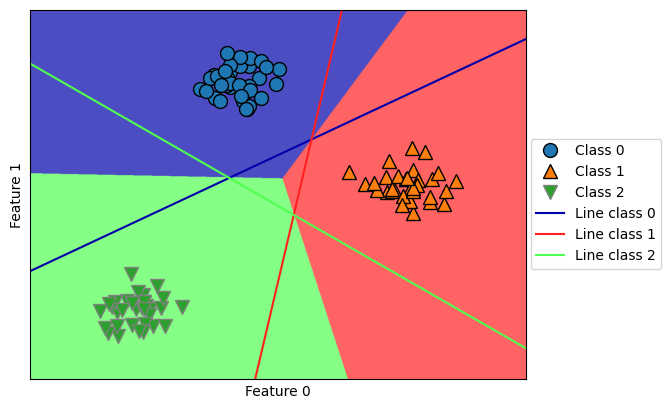

In [91]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses and parameters

The main parameter of linear models is the regularization parameter, called alpha in
 the regression models and C in LinearSVC and LogisticRegression. Large values for
 alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. The other decision you have to make is whether you want to
 use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2.  Linear models are very fast to train, and also fast to predict.  They scale to very large
 datasets and work well with sparse data. Another strength of linear models is that they make it relatively easy to understand
 how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, it is often not entirely clear why coefficients are the way they
 are.Linear models often perform well when the number of features is large compared to
 the number of samples. They are also often used on very large datasets, simply
 because it’s not feasible to train other models. However, in lower-dimensional spaces,
 other models might yield better generalization performance. 

In [94]:
# instantiate model and fit it in one line
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [95]:
# another way to fit and train
logreg = LogisticRegression(max_iter=10000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [96]:
# Finally, you can even do model instantiation, fitting, and predicting in one line
y_pred = LogisticRegression(max_iter=10000).fit(X_train, y_train).predict(X_test)

In [97]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Naive Bayes Classifiers

 The BernoulliNB classifier counts how often every feature of each class is not zero.
 This is most easily understood with an example:

In [98]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

Here, we have four data points, with four binary features each. There are two classes,
 0 and 1. For class 0 (the first and third data points), the first feature is zero two times
 and nonzero zero times, the second feature is zero one time and nonzero one time,
 and so on. 

In [100]:
# example of using it:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# of course other steps of train_test_split, fit, and prediction must be done for the data.

#### Strengths, weaknesses and parameters

 MultinomialNB and BernoulliNB have a single parameter, alpha, which controls
 model complexity. The way alpha works is that the algorithm adds to the data alpha
 many virtual data points that have positive values for all the features. This results in a
 “smoothing” of the statistics. A large alpha means more smoothing, resulting in less
 complex models.  GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. MultinomialNB
 usually performs better than BinaryNB, particularly on datasets with a relatively large
 number of nonzero features (i.e., large documents).

### Decision trees

##### Building decision trees

##### Controlling complexity of decision trees

In [102]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [103]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing Decision Trees

#### Feature Importance in trees

In [106]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


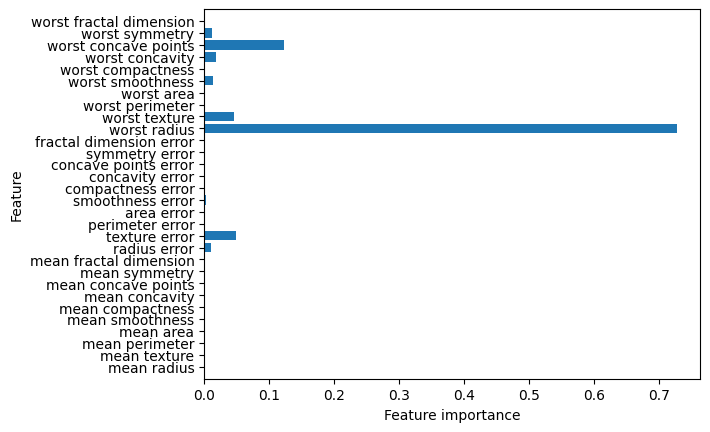

In [107]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

 Here we see that the feature used in the top split (“worst radius”) is by far the most
 important feature. This confirms our observation in analyzing the tree that the first
 level already separates the two classes fairly well.
 However, if a feature has a low feature_importance, it doesn’t mean that this feature
 is uninformative. It only means that the feature was not picked by the tree, likely
 because another feature encodes the same information.

 Let’s look into this in more detail, using a dataset of historical computer memory
 (RAM) prices. Figure 2-31 shows the dataset, with the date on the x-axis and the price
 of one megabyte of RAM in that year on the y-axis

Text(0, 0.5, 'Price in $/Mbyte')

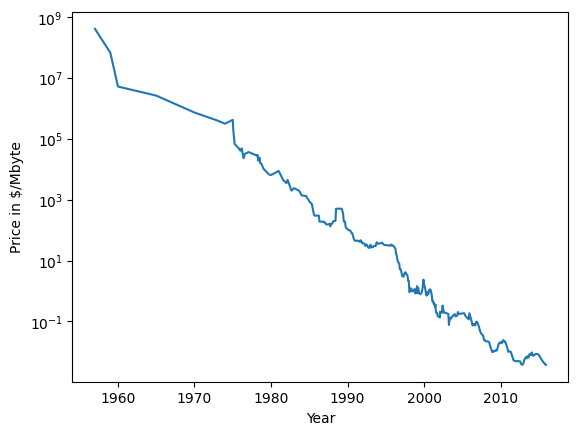

In [110]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join("ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [113]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date.to_numpy()[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

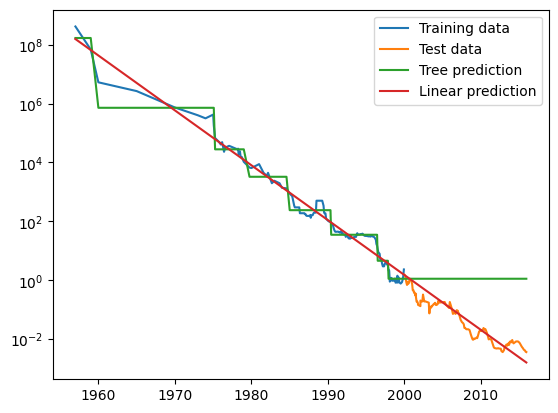

In [114]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The linear model approximates
 the data with a line, as we knew it would. This line provides quite a good forecast for
 the test data (the years after 2000), while glossing over some of the finer variations in
 both the training and the test data. The tree model, on the other hand, makes perfect
 predictions on the training data; we did not restrict the complexity of the tree, so it
 learned the whole dataset by heart. However, once we leave the data range for which
 the model has data, the model simply keeps predicting the last known point. The tree
 has no ability to generate “new” responses, outside of what was seen in the training
 data. This shortcoming applies to all models based on trees.

#### Strengths, weaknesses and parameters

As discussed earlier, the parameters that control model complexity in decision trees
 are the pre-pruning parameters that stop the building of the tree before it is fully
 developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting.
 Decision trees have two advantages over many of the algorithms we’ve discussed so
 far: the resulting model can easily be visualized and understood by nonexperts (at
 least for smaller trees), and the algorithms are completely invariant to scaling of the
 data. As each feature is processed separately, and the possible splits of the data don’t
 depend on scaling, no preprocessing like normalization or standardization of features
 is needed for decision tree algorithms. In particular, decision trees work well when
 you have features that are on completely different scales, or a mix of binary and continuous features.
 The main downside of decision trees is that even with the use of pre-pruning, they
 tend to overfit and provide poor generalization performance. Therefore, in most
 applications, the ensemble methods we discuss next are usually used in place of a single decision tree.